Calculate the mean, median, mode and standard deviation for the problem
statements 1& 2.

In [1]:
import pandas as pd
import numpy as np
import statistics as stat

Problem Statement 1:
The marks awarded for an assignment set for a Year 8 class of 20 students were as
follows:
6 7 5 7 7 8 7 6 9 7 4 10 6 8 8 9 5 6 4 8

In [2]:
marks = [6,7,5,7,7,8,7,6,9,7,4,10,6,8,8,9,5,6,4,8]

In [3]:
mean = stat.mean(marks)

In [4]:
median = stat.median(marks)

In [5]:
mode = stat.mode(marks)

In [6]:
df = { 'mean' : mean ,
     'median' : median,
     'mode' : mode}
df

{'mean': 6.85, 'median': 7.0, 'mode': 7}

Problem Statement 2:
The number of calls from motorists per day for roadside service was recorded for a particular month:
28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170, 100, 75, 104, 97, 75, 123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109

In [7]:
calls = [28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170, 100, 75, 104, 97, 75, 123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109]

In [8]:
len(calls)

35

In [9]:
mean_2 = stat.mean(calls)
median_2 = stat.median(calls)
mode_2 = stat.mode(calls)
df2 = { 'mean' : mean_2,
     'median' : median_2,
     'mode' : mode_2}
df2

{'mean': 107.51428571428572, 'median': 100, 'mode': 75}

Problem Statement 3:
The number of times I go to the gym in weekdays, are given below along with its associated probability:
x = 0, 1, 2, 3, 4, 5
f(x) = 0.09, 0.15, 0.40, 0.25, 0.10, 0.01
Calculate the mean no. of workouts in a week. Also evaluate the variance involved in
it.

In [10]:
x = [0, 1, 2, 3, 4, 5]
p_x = [0.09, 0.15, 0.40, 0.25, 0.10, 0.01]

In [25]:
# mean for discrete data ---> sum(x * p(x))
zipped = zip(x,p_x)
zipped_set = set(zipped)
add = [a*b for a,b in zipped_set]
mean_3 = sum(add)

2.15

In [31]:
# variance of discrete data ---> sum(E(x**2) - E(x)**2)
## E(x) --> previously found from mean_3
## now finding E(x**2) --> sum(x**2 * p(x))
## the value of variance tells how the dataset can vary if high var --> wide range of values, if low variance --> narrow range of values
x_square = list(map(lambda i: i**2,x))
zipped_2 = zip(x_square,p_x)
zipped_set_2 = set(zipped_2)
add = [a*b for a,b in zipped_set_2]
variance_3 = sum(add) - mean_3**2
variance_3

1.2275

Problem Statement 4:
Let the continuous random variable D denote the diameter of the hole drilled in an aluminum sheet. The target diameter to be achieved is 12.5mm. Random disturbances in the process often result in inaccuracy.
Historical data shows that the distribution of D can be modelled by the 
PDF (d) = 20e−20(d−12.5), d ≥ 12.5. 
If a part with diameter > 12.6 mm needs to be scrapped,
what is the proportion of those parts? What is the CDF when the diameter is of 11mm? What is your conclusion regarding the proportion of scraps?

In [52]:
import sympy as sy

In [82]:
d,x=sy.symbols('d,x')
fnd = (20*10**-20)*(d-12.5)
sy.Integral(fnd)

Integral(2.0e-19*d - 2.5e-18, d)

In [85]:
## finding cdf 
area_1 = sy.integrate(fnd,(d,12.5,12.6))
# x be some point btwn 12.6 and +np.inf
area_2 = sy.Integral(fnd,(d,12.6,x))

In [86]:
area_1+area_2

Integral(2.0e-19*d - 2.5e-18, (d, 12.6, x)) + 1.00000000000177e-21

conclusion:
1) f(d) ---> when d lies btwn (-np.inf,12.5) -----> value is 0
2) f(d) ---> when d lies btwn (12.5,+np.inf) -----> value is 1.0⋅10−19𝑥2−2.5⋅10−18𝑥+1.5624⋅10−17
3) f(d) ---> when d lies btwn (12.5,12.6)    -----> value is 1.00000000000177⋅10−21
4) CDF when d=11 then value will be 0

Problem Statement 5:

A company manufactures LED bulbs with a faulty rate of 30%. If I randomly select 6
chosen LEDs, what is the probability of having 2 faulty LEDs in my sample?
Calculate the average value of this process. Also evaluate the standard deviation
associated with it.

In [87]:
prob_of_faulty = 0.3
prob_of_not_faulty = 0.7
n = 6
r = 2
## based on the parameters given it suits binomial distribution

In [101]:
from scipy.stats import binom
import seaborn as sns
import math
binom_prob_1 = binom.pmf(k=r,n=n,p=prob_of_faulty)

In [102]:
binom_prob_1

0.32413499999999995

In [103]:
mean = n * prob_of_faulty 
std = math.sqrt(n * prob_of_faulty * prob_of_not_faulty)
mean,std

(1.7999999999999998, 1.1224972160321822)

Problem Statement 6:

Gaurav and Barakha are both preparing for entrance exams. Gaurav attempts to solve 8 questions per day with a correction rate of 75%, while Barakha averages around 12 questions per day with a correction rate of 45%. What is the probability
that each of them will solve 5 questions correctly? What happens in cases of 4 and 6 correct solutions? What do you infer from it? What are the two main governing factors affecting their ability to solve questions correctly? Give a pictorial
representation of the same to validate your answer.

In [104]:
## as there is mention of average(per day) poisson distribution suits well for this
from scipy.stats import poisson
gaurav_total = 8
barakha_total = 12
gaurav_crrct = (3/4) * gaurav_total 
barakha_crrct = (45/100)* barakha_total
gaurav_crrct,barakha_crrct

(6.0, 5.4)

In [127]:
poisson_prob_1 = poisson.pmf(mu=gaurav_crrct,k=5)
poisson_prob_1

0.16062314104797995

In [128]:
poisson_prob_2 = poisson.pmf(mu=gaurav_crrct,k=4)
poisson_prob_3 = poisson.pmf(mu=gaurav_crrct,k=6)
poisson_prob_2,poisson_prob_3

(0.13385261753998332, 0.1606231410479801)

In [129]:
poisson_prob_4 = poisson.pmf(mu=barakha_crrct,k=5)
poisson_prob_4

0.1728213330760574

In [130]:
poisson_prob_5 = poisson.pmf(mu=barakha_crrct,k=4)
poisson_prob_6 = poisson.pmf(mu=barakha_crrct,k=6)
poisson_prob_5,poisson_prob_6

(0.16001975284820127, 0.15553919976845174)

In [132]:
# when x=5
total_crrct_prob = poisson_prob_1 + poisson_prob_4
total_crrct_prob

0.3334444741240373

In [139]:
gaurav_dist = [poisson_prob_2,poisson_prob_1,poisson_prob_3]
barakha_dist = [poisson_prob_5,poisson_prob_4,poisson_prob_6]
gaurav_dist

[0.13385261753998332, 0.16062314104797995, 0.1606231410479801]

In [140]:
barakha_dist

[0.16001975284820127, 0.1728213330760574, 0.15553919976845174]

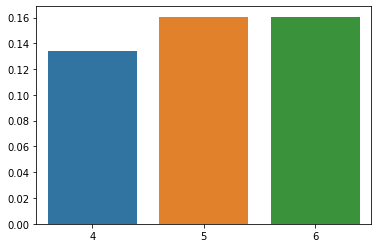

In [141]:
sns.barplot([4,5,6],gaurav_dist)

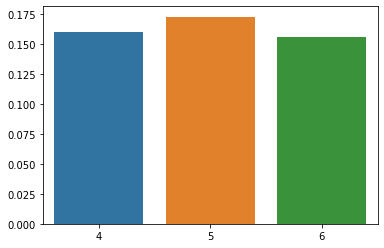

In [144]:
sns.barplot([4,5,6],barakha_dist)

conclusion:
1) the value of correction rate given affects the performance of both people
2) from the bars above it can be inferenced that as the value of k (on x axis poisson random variables) is some extremes the probability will be lower and in middle there will be a peak (high probability of solving correctly when k = 5)
note : we can observe the full graph in case of gaurav, below shows a way

Text(0, 0.5, 'probability')

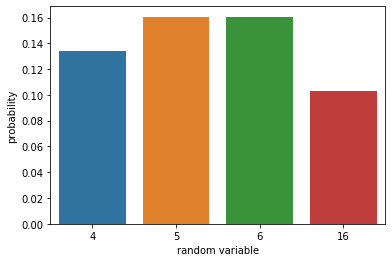

In [157]:
import matplotlib.pyplot as plt
%matplotlib inline
poisson_prob_8 = poisson.pmf(mu=gaurav_crrct,k=8)
gaurav_dist_2 = [poisson_prob_2,poisson_prob_1,poisson_prob_3,poisson_prob_8]
sns.barplot([4,5,6,16],gaurav_dist_2)
plt.xlabel("random variable")
plt.ylabel("probability")

Problem Statement 7:
Customers arrive at a rate of 72 per hour to my shop. What is the probability of k customers arriving in 4 minutes? 
a) 5 customers, 
b) not more than 3 customers, 
c)more than 3 customers. Give a pictorial representation of the same to validate your answer.

In [160]:
cust = 72/60 #hours to min
cust = cust*4 # as we need 4 min

In [161]:
# k = 5
poisson_prob_cust_1 = poisson.pmf(mu=cust,k=5)
poisson_prob_cust_1

0.17474768364388296

In [167]:
# k =0,1,2
poisson_prob_cust_2 = poisson.pmf(mu=cust,k=0)
poisson_prob_cust_3 = poisson.pmf(mu=cust,k=1)
poisson_prob_cust_4 = poisson.pmf(mu=cust,k=2)
less_than_3 = poisson_prob_cust_2 + poisson_prob_cust_3 + poisson_prob_cust_4
less_than_3

0.14253921888902693

In [168]:
# more than 3
more_than_3 = 1 - less_than_3
more_than_3

0.8574607811109731

In [169]:
poisson_prob_cust_5 = poisson.pmf(mu=cust,k=10)
poisson_prob_cust_5

0.014724339679652799

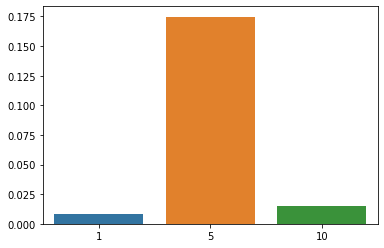

In [170]:
graph_cust = [poisson_prob_cust_2,poisson_prob_cust_1,poisson_prob_cust_5]
sns.barplot([1,5,10],graph_cust)

conclusion:
1) this says that there will be high probability that 5 customers will visit in 4 minutes

In [ ]:
Problem Statement 8:
I work as a data analyst in Aeon Learning Pvt. Ltd. After analyzing data, I make
reports, where I have the efficiency of entering 77 words per minute with 6 errors per
hour. What is the probability that I will commit 2 errors in a 455-word financial report?
What happens when the no. of words increases/decreases (in case of 1000 words,
255 words)?
How is the λ affected?
How does it influence the PMF?
Give a pictorial representation of the same to validate your answer.

In [174]:
avg_error = 77*60/6
avg_error

770.0

In [175]:
random_value_1 = 455/2
random_value_1

227.5

In [176]:
poisson_prob_error_words_1 = poisson.pmf(mu=avg_error,k=random_value_1)
poisson_prob_error_words_1

0.0

In [178]:
random_value_2 = 1000/2
poisson_prob_error_words_2 = poisson.pmf(mu=avg_error,k=random_value_2)
poisson_prob_error_words_2

5.652010833375621e-26

In [179]:
random_value_3 = 225/2
poisson_prob_error_words_3 = poisson.pmf(mu=avg_error,k=random_value_3)
poisson_prob_error_words_3

0.0

In [183]:
random_value_4 = 10000/2
poisson_prob_error_words_4 = poisson.pmf(mu=avg_error,k=random_value_4)
poisson_prob_error_words_4

0.0

Text(0, 0.5, 'probabilities')

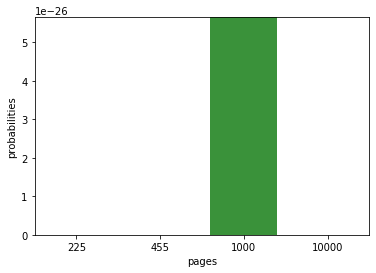

In [184]:
sns.barplot([225,455,1000,10000],[poisson_prob_error_words_3,poisson_prob_error_words_1,poisson_prob_error_words_2,poisson_prob_error_words_4])
plt.xlabel('pages')
plt.ylabel('probabilities')

conclusion:
1) The λ is getting affected by the no of pages and no of errors
2) The pmf is getting affected as, when the λ is either in two extremes ends the probabilty is low and high in the middle part

In [ ]:
Problem Statement 9:

Let the continuous random variable D denote the diameter of the hole drilled in an
aluminum sheet. The target diameter to be achieved is 12.5mm. Random
disturbances in the process often result in inaccuracy.
Historical data shows that the distribution of D can be modelled by the PDF, f(d) =
20e−20(d−12.5), d ≥ 12.5. If a part with diameter > 12.6 mm needs to be scrapped,
what is the proportion of those parts? What is the CDF when the diameter is of 11
mm?
What is the conclusion of this experiment?

In [186]:
d,x=sy.symbols('d,x')
fnd = (20*10**-20)*(d-12.5)
print(sy.Integral(fnd))
## finding cdf 
area_1 = sy.integrate(fnd,(d,12.5,12.6))
# x be some point btwn 12.6 and +np.inf
area_2 = sy.Integral(fnd,(d,12.6,x))
area_1+area_2


Integral(2.0e-19*d - 2.5e-18, d)


Integral(2.0e-19*d - 2.5e-18, (d, 12.6, x)) + 1.00000000000177e-21

conclusion:
1) f(d) ---> when d lies btwn (-np.inf,12.5) -----> value is 0
2) f(d) ---> when d lies btwn (12.5,+np.inf) -----> value is 1.0⋅10−19𝑥2−2.5⋅10−18𝑥+1.5624⋅10−17
3) f(d) ---> when d lies btwn (12.5,12.6)    -----> value is 1.00000000000177⋅10−21
4) CDF when d=11 then value will be 0

Problem Statement 10:

Please compute the following:
a) P(Z > 1.26), . P(Z < −0.86), P(Z > −1.37), P(−1.25 < Z < 0.37), . P(Z ≤ −4.6)
b) Find the value z such that P(Z > z) = 0.05
c) Find the value of z such that P(−z < Z < z) = 0.99

In [212]:
from scipy import stats 
#P(Z > 1.26)
1-stats.norm.cdf(1.26)

0.10383468112130045

In [213]:
#P(Z < −0.86)
stats.norm.cdf(-0.86)

0.1948945212518084

In [214]:
#P(Z > −1.37)
1 - stats.norm.cdf(-1.37) 

0.914656549178033

In [205]:
#P(−1.25 < Z < 0.37)
stats.norm.cdf(0.37) - stats.norm.cdf(-1.25) 

0.5386589811336914

In [216]:
#P(Z ≤ −4.6)
stats.norm.cdf(4.5)

0.9999966023268753

b) Find the value z such that P(Z > z) = 0.05

In [230]:
z = stats.norm.ppf(0.05)
z #P(z<-1.64)

-1.6448536269514729

c) Find the value of z such that P(−z < Z < z) = 0.99

In [224]:
z = stats.norm.ppf(0.99)
print(z)

2.3263478740408408


In [225]:
stats.norm.cdf(2.3263478740408408)

0.99

In [232]:
stats.norm.cdf(-2.3263478740408408)

0.01

In [236]:
#P(−2.3263478740408408 < Z < 2.3263478740408408) = 0.99